In [26]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install --upgrade tensorflow keras


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 932.9 kB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 1.0 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 1.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.7.0
    Uninstalling keras-3.7.0:
      Successfully uninstalled keras-3.7.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler


In [2]:
plt.style.use('fivethirtyeight')


In [3]:

df = pd.read_csv(r"C:\Users\Ranjith\Downloads\HDFC.csv")
print('Number of rows and columns: ', df.shape)
print(df.head(5))
print("Checking if any null values are present:\n", df.isna().sum())


Number of rows and columns:  (6038, 7)
         Date   Open   High    Low  Close  Adj Close    Volume
0  1996-01-01  3.030  3.030  2.925  2.980   0.595425  350000.0
1  1996-01-02  2.980  3.025  2.950  2.975   0.594426  412000.0
2  1996-01-03  2.975  2.995  2.950  2.985   0.596424  284000.0
3  1996-01-04  2.985  2.980  2.940  2.965   0.592428  282000.0
4  1996-01-05  2.965  2.980  2.950  2.960   0.591429  189000.0
Checking if any null values are present:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


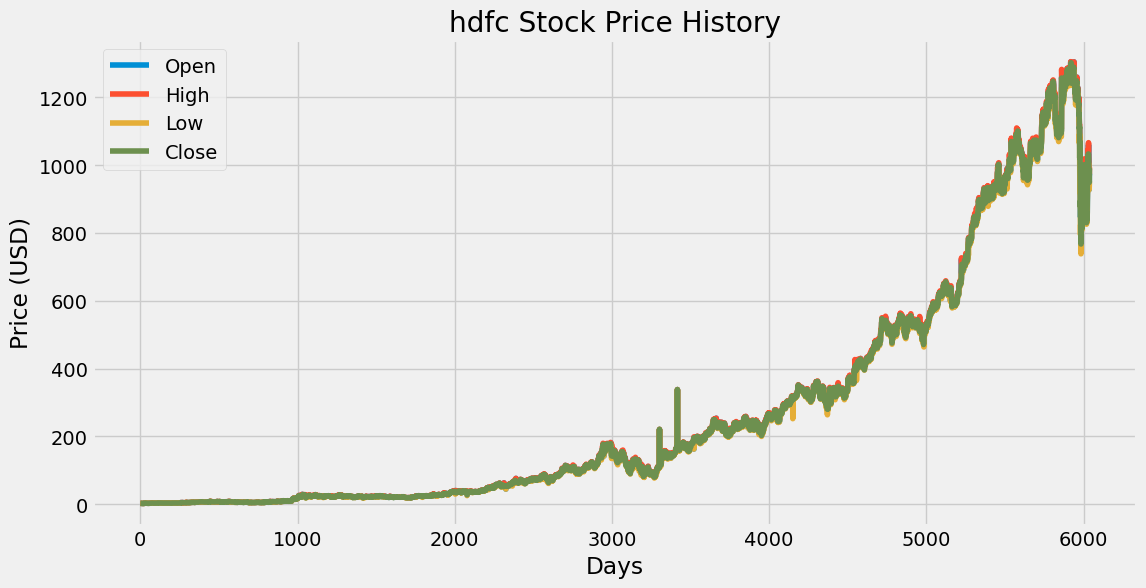

In [4]:
# Plotting stock price history
plt.figure(figsize=(12, 6))
plt.plot(df["Open"], label='Open')
plt.plot(df["High"], label='High')
plt.plot(df["Low"], label='Low')
plt.plot(df["Close"], label='Close')
plt.title('hdfc Stock Price History')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(loc='upper left')
plt.show()


In [5]:
# Create a dataframe with only the Close Stock Price Column
data_target = df.filter(['Close'])
target = data_target.values

# Training set has 75% of the data
training_data = math.ceil(len(target) * 0.75)


In [6]:
# Normalizing data before model fitting using MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_scaled_data = sc.fit_transform(target)

# Create a training dataset
train_data = training_scaled_data[0:training_data, :]


In [7]:
X_train = []
y_train = []
for i in range(180, len(train_data)):
    X_train.append(train_data[i-180:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('Number of rows and columns: ', X_train.shape)


Number of rows and columns:  (4349, 180, 1)


In [15]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compiling the RNN
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())


C:\Users\Ranjith\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 180, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 180, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 180, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 180, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 180, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 180, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
 22/136 ━━━━━━━━━━━━━━━━━━━━ 57s 505ms/step - loss: 0.0056

In [39]:
# Getting the predicted stock price
test_data = training_scaled_data[training_data - 180:, :]
X_test = []
y_test = target[training_data:, :]
for i in range(180, len(test_data)):
    X_test.append(test_data[i-180:i, 0])

# Convert x_test to a numpy array
X_test = np.array(X_test)

# Reshape the data into the shape accepted by the LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print('Number of rows and columns: ', X_test.shape)


Number of rows and columns:  (1509, 180, 1)


In [41]:
# Making predictions using the test dataset
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step


C:\Users\Ranjith\AppData\Local\Temp\ipykernel_2736\1155840566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_stock_price


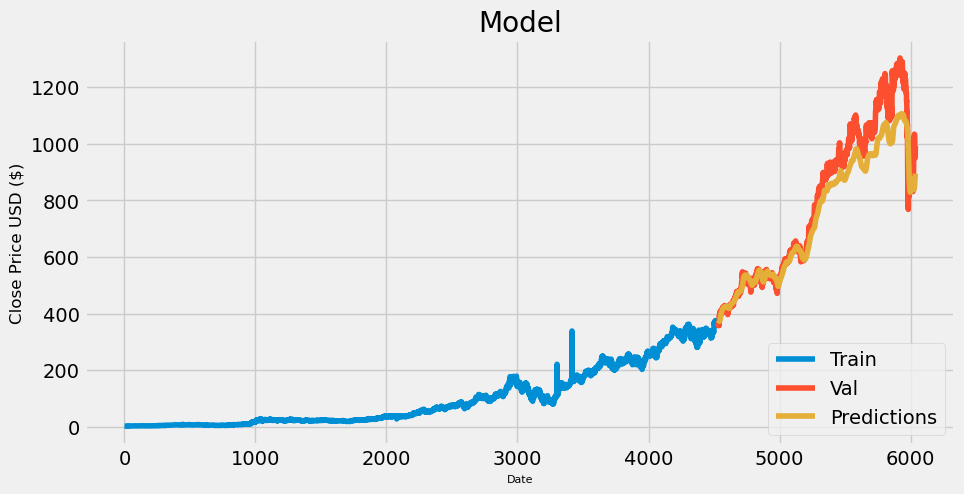

In [42]:
# Create the data for the graph
train = data_target[:training_data]
valid = data_target[training_data:]
valid['Predictions'] = predicted_stock_price

# Visualize the data
plt.figure(figsize=(10, 5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
